In [2]:
import pandas as pd
import numpy as np
from validation import read_grid_search_results
import ast
from scipy.stats import rankdata
import seaborn as sns
import matplotlib.pyplot as plt
import json

results_paths = [
	'fine_gs2_results_giulia1.csv',
	'fine_gs2_results_giulia2.csv',
	'fine_gs2_results_giulia3.csv',
	'fine_gs2_results_irene1.csv',
	'fine_gs2_results_irene2.csv',
	'fine_gs2_results_irene3.csv',
	'fine_gs2_results_lorenzo1.csv',
	'fine_gs2_results_lorenzo2.csv',
	'fine_gs2_results_lorenzo3.csv'
]
K = 5

# concatenate results into a single dataframe
scores_df = pd.DataFrame(columns=[])
for path in results_paths:
	partial_scores_df = pd.read_csv(path, sep=",")
	scores_df = pd.concat([scores_df, partial_scores_df], ignore_index=True)

# rank results
scores_df['val_mee_mean_rank'] = rankdata(scores_df['val_mee_mean'], method='dense')
scores_df['val_mse_mean_rank'] = rankdata(scores_df['val_mse_mean'], method='dense')
scores_df['tr_mee_mean_rank'] = rankdata(scores_df['tr_mee_mean'], method='dense')
scores_df['tr_mse_mean_rank'] = rankdata(scores_df['tr_mse_mean'], method='dense')

# sort results by 'val_score_mean_rank'
scores_df = scores_df.sort_values(by=['val_mee_mean_rank'], ignore_index=True)
scores_df.drop(scores_df.columns[0], axis=1, inplace=True)

columns_order = [
	'val_mse_mean_rank',
	'val_mse_mean',
	'val_mse_dev',
	'val_mee_mean_rank',
	'val_mee_mean',
	'val_mee_dev',
	'tr_mse_mean_rank',
	'tr_mse_mean',
	'tr_mse_dev',
	'tr_mee_mean_rank',
	'tr_mee_mean',
	'tr_mee_dev',
]
for i in range(K):
	columns_order.append('split%d_val_mse'%(i))
	columns_order.append('split%d_val_mee'%(i))
	columns_order.append('split%d_tr_mse'%(i))
	columns_order.append('split%d_tr_mee'%(i))
	columns_order.append('split%d_best_epoch'%(i))
columns_order.append('params')
scores_df = scores_df[columns_order]

# write params as csv deleting fixed params
rem_list = [ 
	'activation_out',
	'classification',
	'early_stopping',
	'evaluation_metric',
	'loss',
	'metric_decrease_tol',
	'random_state',
	'reinit_weights',
	'stopping_patience',
	'tol',
	'validation_size',
	'verbose',
	'weights_bound',
	'weights_dist',
	'epochs',
	'tau',
	'batch_size',
	'activation_hidden'
	]
params_df = pd.DataFrame(columns=[])
for param in scores_df['params']: # TODO: fare in modo migliore?
	params_dict = json.loads(param)
	#params_dict = ast.literal_eval(param)
	for key in rem_list:
		if key in params_dict:
			del params_dict[key]
	params_df = pd.concat([params_df, pd.DataFrame([params_dict])], ignore_index=True)

params_df['val_mee_mean'] = scores_df['val_mee_mean']
params_df['val_mse_mean'] = scores_df['val_mse_mean']
params_df['tr_mee_mean'] = scores_df['tr_mee_mean']
params_df['tr_mee_dev'] = scores_df['tr_mee_dev']
params_df['tr_mse_mean'] = scores_df['tr_mse_mean']
params_df['tr_mse_dev'] = scores_df['tr_mse_dev']
params_df['val_mee_dev'] = scores_df['val_mee_dev']
params_df['val_mse_dev'] = scores_df['val_mse_dev']
params_df['split0_val_mee'] = scores_df['split0_val_mee']
params_df['split1_val_mee'] = scores_df['split1_val_mee']
params_df['split2_val_mee'] = scores_df['split2_val_mee']
params_df['split3_val_mee'] = scores_df['split3_val_mee']
params_df['split4_val_mee'] = scores_df['split4_val_mee']
params_df['split0_best_epoch'] = scores_df['split0_best_epoch']
params_df['split1_best_epoch'] = scores_df['split1_best_epoch']
params_df['split2_best_epoch'] = scores_df['split2_best_epoch']
params_df['split3_best_epoch'] = scores_df['split3_best_epoch']
params_df['split4_best_epoch'] = scores_df['split4_best_epoch']
params_df['val_mee_mean_rank'] = scores_df['val_mee_mean_rank']

hidden_layer_sizes = []
for i in range(len(params_df)):
	if (params_df['hidden_layer_sizes'][i]) == [30, 30, 30]:
		hidden_layer_sizes.append('30-30-30')
	elif (params_df['hidden_layer_sizes'][i]) == [60, 30]:
		hidden_layer_sizes.append('60-30')
params_df['hidden'] = hidden_layer_sizes
params_df

,alpha,hidden_layer_sizes,lambd,learning_rate,learning_rate_init,nesterov,val_mee_mean,val_mse_mean,tr_mee_mean,tr_mee_dev,...,split2_val_mee,split3_val_mee,split4_val_mee,split0_best_epoch,split1_best_epoch,split2_best_epoch,split3_best_epoch,split4_best_epoch,val_mee_mean_rank,hidden
0,0.75,"[60, 30]",0.00010,linear_decay,0.06,False,1.430720,1.707028,1.249829,0.029249,...,1.265092,1.409185,1.380657,301.0,455.0,499.0,301.0,496.0,1,60-30
1,0.80,"[60, 30]",0.00050,linear_decay,0.06,False,1.431924,1.704256,1.266569,0.037283,...,1.271011,1.365837,1.383952,294.0,274.0,241.0,244.0,265.0,2,60-30
2,0.85,"[60, 30]",0.00010,linear_decay,0.05,False,1.432601,1.762881,1.202508,0.033081,...,1.269579,1.305997,1.417149,287.0,468.0,477.0,497.0,288.0,3,60-30
3,0.80,"[60, 30]",0.00025,linear_decay,0.06,False,1.432933,1.720030,1.248408,0.036644,...,1.271880,1.370024,1.383125,296.0,320.0,274.0,207.0,265.0,4,60-30
4,0.70,"[30, 30, 30]",0.00010,linear_decay,0.06,False,1.433431,1.714139,1.262388,0.019703,...,1.270595,1.372049,1.379813,361.0,304.0,328.0,308.0,490.0,5,30-30-30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1115,0.75,"[30, 30, 30]",0.00100,linear_decay,0.12,True,4.235649,14.479126,3.358939,2.220498,...,6.946174,1.425629,7.458508,18.0,223.0,18.0,270.0,49.0,1116,30-30-30
1116,0.80,"[30, 30, 30]",0.00010,linear_decay,0.12,True,4.239057,14.385574,2.980808,1.454884,...,7.073073,1.366794,1.525055,31.0,93.0,15.0,499.0,491.0,1117,30-30-30
1117,0.85,"[30, 30, 30]",0.00100,linear_decay,0.12,True,4.732601,16.136666,4.672408,2.286461,...,6.890485,1.349940,4.105515,10.0,92.0,18.0,271.0,74.0,1118,30-30-30
1118,0.85,"[30, 30, 30]",0.00010,linear_decay,0.12,True,5.218057,19.962865,4.269184,2.377373,...,2.244744,7.398794,7.410912,25.0,472.0,65.0,14.0,37.0,1119,30-30-30


Text(0, 0.5, 'val_mee_mean')

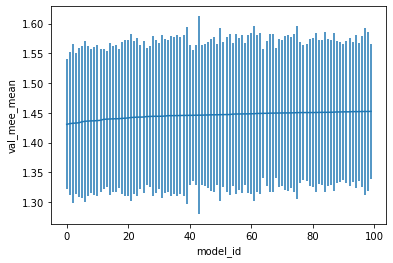

In [3]:
plt.errorbar(x=np.arange(100), y=params_df['val_mee_mean'][:100], yerr=params_df['val_mee_dev'][:100])
plt.xlabel("model_id")
plt.ylabel("val_mee_mean")

Text(0, 0.5, 'val_mse_mean')

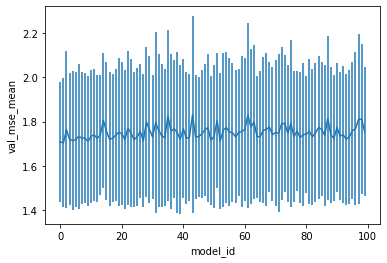

In [4]:
plt.errorbar(x=np.arange(100), y=params_df['val_mse_mean'][:100], yerr=params_df['val_mse_dev'][:100])
plt.xlabel("model_id")
plt.ylabel("val_mse_mean")

Text(0, 0.5, 'tr_mee_mean')

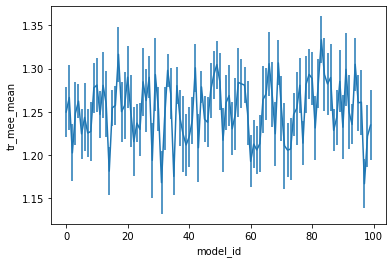

In [5]:
plt.errorbar(x=np.arange(100), y=params_df['tr_mee_mean'][:100], yerr=params_df['tr_mee_dev'][:100])
plt.xlabel("model_id")
plt.ylabel("tr_mee_mean")

Text(0, 0.5, 'tr_mee_mean')

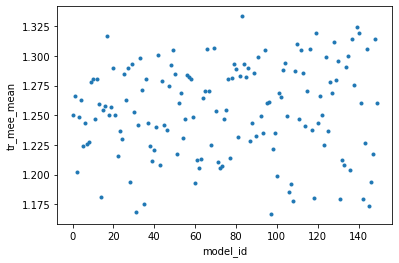

In [43]:
plt.plot(params_df['tr_mee_mean'][:150], '.')
plt.xlabel("model_id")
plt.ylabel("tr_mee_mean")

Text(0, 0.5, 'tr_mse_mean')

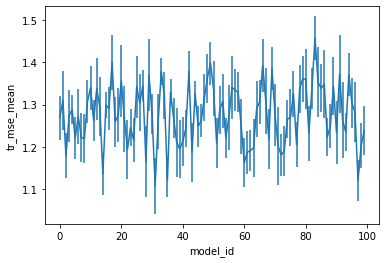

In [7]:
plt.errorbar(x=np.arange(100), y=params_df['tr_mse_mean'][:100], yerr=params_df['tr_mse_dev'][:100])
plt.xlabel("model_id")
plt.ylabel("tr_mse_mean")

Text(0, 0.5, 'tr_mse_mean')

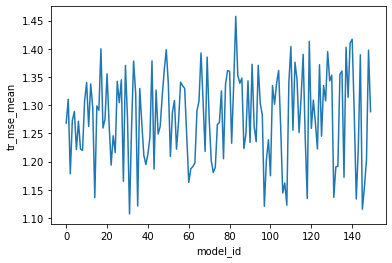

In [8]:
plt.plot(params_df['tr_mse_mean'][:150])
plt.xlabel("model_id")
plt.ylabel("tr_mse_mean")

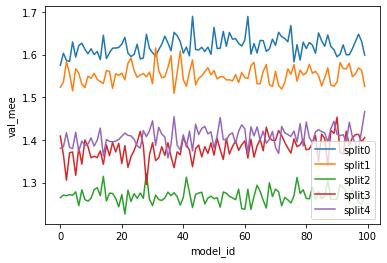

In [9]:
plt.plot(np.arange(100), params_df['split0_val_mee'][:100], label='split0')
plt.plot(np.arange(100), params_df['split1_val_mee'][:100], label='split1')
plt.plot(np.arange(100), params_df['split2_val_mee'][:100], label='split2')
plt.plot(np.arange(100), params_df['split3_val_mee'][:100], label='split3')
plt.plot(np.arange(100), params_df['split4_val_mee'][:100], label='split4')
plt.xlabel("model_id")
plt.ylabel("val_mee")
plt.legend()

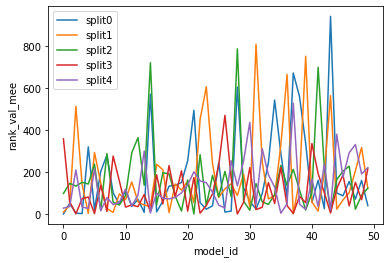

In [10]:
params_df['split0_val_mee_rank'] = rankdata(params_df['split0_val_mee'], method='dense')
params_df['split1_val_mee_rank'] = rankdata(params_df['split1_val_mee'], method='dense')
params_df['split2_val_mee_rank'] = rankdata(params_df['split2_val_mee'], method='dense')
params_df['split3_val_mee_rank'] = rankdata(params_df['split3_val_mee'], method='dense')
params_df['split4_val_mee_rank'] = rankdata(params_df['split4_val_mee'], method='dense')
plt.plot(params_df['split0_val_mee_rank'][:50], label='split0')
plt.plot(params_df['split1_val_mee_rank'][:50], label='split1')
plt.plot(params_df['split2_val_mee_rank'][:50], label='split2')
plt.plot(params_df['split3_val_mee_rank'][:50], label='split3')
plt.plot(params_df['split4_val_mee_rank'][:50], label='split4')
plt.xlabel("model_id")
plt.ylabel("rank_val_mee")
plt.legend()

In [36]:
params_df['split0_val_mee_rank']

0          1
1         52
2          5
3          3
4        321
        ... 
1115    1100
1116    1117
1117    1112
1118    1120
1119    1106
Name: split0_val_mee_rank, Length: 1120, dtype: int64

In [42]:
print(list(params_df['split0_val_mee_rank'][:100]))
print(list(params_df['split1_val_mee_rank'][:100]))
print(list(params_df['split2_val_mee_rank'][:100]))
print(list(params_df['split3_val_mee_rank'][:100]))
print(list(params_df['split4_val_mee_rank'][:100]))

[1, 52, 5, 3, 321, 21, 204, 282, 102, 47, 113, 37, 71, 9, 572, 11, 62, 134, 138, 151, 255, 495, 55, 24, 40, 246, 10, 15, 606, 126, 61, 25, 98, 247, 544, 290, 80, 673, 561, 337, 57, 162, 26, 943, 101, 88, 156, 72, 161, 41, 788, 124, 133, 697, 181, 670, 418, 453, 274, 189, 398, 940, 43, 272, 59, 383, 379, 75, 110, 424, 211, 675, 526, 461, 328, 830, 2, 237, 7, 315, 125, 308, 220, 53, 658, 373, 183, 584, 174, 96, 23, 45, 234, 34, 35, 115, 336, 607, 351, 31]
[10, 42, 514, 143, 4, 294, 149, 27, 9, 97, 69, 154, 59, 44, 36, 238, 212, 8, 144, 115, 158, 56, 452, 607, 240, 80, 121, 145, 89, 191, 35, 809, 248, 73, 88, 330, 666, 2, 160, 753, 58, 15, 195, 565, 24, 68, 103, 207, 318, 124, 242, 61, 90, 92, 54, 57, 49, 129, 39, 180, 78, 66, 391, 487, 32, 34, 217, 415, 25, 13, 209, 20, 6, 40, 286, 135, 417, 47, 260, 122, 159, 424, 153, 214, 106, 18, 75, 305, 22, 17, 41, 479, 296, 285, 451, 91, 141, 307, 249, 14]
[99, 147, 134, 152, 144, 239, 18, 289, 57, 44, 89, 293, 365, 138, 722, 45, 198, 192, 86, 15,

In [35]:
print((params_df['split0_val_mee_rank'][0]+
params_df['split1_val_mee_rank'][0]+
params_df['split2_val_mee_rank'][0]+
params_df['split3_val_mee_rank'][0]+
params_df['split4_val_mee_rank'][0])/5)
print(params_df['split0_val_mee_rank'][0])
print(params_df['split1_val_mee_rank'][0])
print(params_df['split2_val_mee_rank'][0])
print(params_df['split3_val_mee_rank'][0])
print(params_df['split4_val_mee_rank'][0])
print()
print((params_df['split0_val_mee_rank'][1]+
params_df['split1_val_mee_rank'][1]+
params_df['split2_val_mee_rank'][1]+
params_df['split3_val_mee_rank'][1]+
params_df['split4_val_mee_rank'][1])/5)
print(params_df['split0_val_mee_rank'][1])
print(params_df['split1_val_mee_rank'][1])
print(params_df['split2_val_mee_rank'][1])
print(params_df['split3_val_mee_rank'][1])
print(params_df['split4_val_mee_rank'][1])

99.6
1
10
99
359
29

67.6
52
42
147
60
37


[]

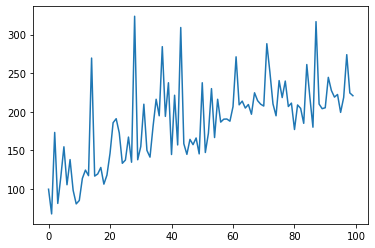

In [28]:
plt.plot(
	(params_df['split0_val_mee_rank'][:100]+
	params_df['split1_val_mee_rank'][:100]+
	params_df['split2_val_mee_rank'][:100]+
	params_df['split3_val_mee_rank'][:100]+
	params_df['split4_val_mee_rank'][:100])/5
	)
plt.plot()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


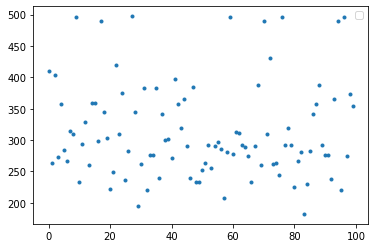

In [13]:
plt.plot((params_df['split0_best_epoch'][:100]+
		params_df['split1_best_epoch'][:100]+
		params_df['split2_best_epoch'][:100]+
		params_df['split3_best_epoch'][:100]+
		params_df['split4_best_epoch'][:100])/5
		,'.')
plt.legend()

In [14]:
params_df['mean_best_epoch'] = (params_df['split0_best_epoch']+
		params_df['split1_best_epoch']+
		params_df['split2_best_epoch']+
		params_df['split3_best_epoch']+
		params_df['split4_best_epoch'])/5
params_df['mean_best_epoch'][:50]

0     410.4
1     263.6
2     403.4
3     272.4
4     358.2
5     283.6
6     266.4
7     315.0
8     309.2
9     495.6
10    233.0
11    294.6
12    329.6
13    260.4
14    359.6
15    358.4
16    298.0
17    490.4
18    345.4
19    303.8
20    222.8
21    249.6
22    419.0
23    309.0
24    374.4
25    236.4
26    282.8
27    497.4
28    344.2
29    194.4
30    261.6
31    383.2
32    221.2
33    275.6
34    275.6
35    383.0
36    240.0
37    342.0
38    300.8
39    301.6
40    271.6
41    397.2
42    358.0
43    319.8
44    365.4
45    291.2
46    240.0
47    385.0
48    233.0
49    233.8
Name: mean_best_epoch, dtype: float64

In [15]:
params_df[:200].groupby(['learning_rate', 'learning_rate_init', 'alpha', 'hidden', 'nesterov', 'lambd']).size().sort_values(ascending=False)

learning_rate  learning_rate_init  alpha  hidden    nesterov  lambd  
fixed          0.004               0.90   30-30-30  False     0.00010    1
linear_decay   0.080               0.75   30-30-30  False     0.00050    1
                                   0.70   30-30-30  False     0.00025    1
                                                              0.00050    1
                                                    True      0.00025    1
                                                                        ..
               0.060               0.60   30-30-30  True      0.00025    1
                                          60-30     False     0.00025    1
                                   0.65   30-30-30  False     0.00010    1
                                                    True      0.00050    1
               0.120               0.80   60-30     False     0.00050    1
Length: 200, dtype: int64

In [16]:
params_df[:200].groupby(['learning_rate', 'learning_rate_init']).size().sort_values(ascending=False)

learning_rate  learning_rate_init
linear_decay   0.060                 42
               0.080                 42
               0.050                 34
               0.100                 26
               0.120                 21
               0.040                 18
fixed          0.008                  8
               0.006                  4
               0.010                  4
               0.004                  1
dtype: int64

In [17]:
params_df[:-200].groupby(['learning_rate', 'learning_rate_init']).size().sort_values(ascending=False)

learning_rate  learning_rate_init
linear_decay   0.060                 105
               0.080                 105
               0.040                 101
               0.050                 101
fixed          0.008                  95
               0.006                  90
linear_decay   0.100                  90
fixed          0.004                  80
linear_decay   0.120                  69
fixed          0.010                  59
               0.002                  25
dtype: int64

In [18]:
params_df[(params_df['learning_rate']=='linear_decay') & (params_df['learning_rate_init']==0.06)][:100].groupby(['lambd']).size().sort_values(ascending=False)

lambd
0.00010    24
0.00025    24
0.00050    24
0.00100    24
0.00500     4
dtype: int64

In [19]:
params_df[(params_df['learning_rate']=='linear_decay') & (params_df['learning_rate_init']==0.06)][:100].groupby(['hidden']).size().sort_values(ascending=False)

hidden
30-30-30    51
60-30       49
dtype: int64

In [20]:
params_df[(params_df['learning_rate']=='linear_decay') & (params_df['learning_rate_init']==0.06)][:100].groupby(['alpha', 'nesterov']).size().sort_values(ascending=False)

alpha  nesterov
0.80   False       9
       True        9
0.85   False       9
       True        9
0.60   False       8
       True        8
0.65   False       8
       True        8
0.70   False       8
       True        8
0.75   False       8
       True        8
dtype: int64

In [21]:
params_df[(params_df['learning_rate']=='linear_decay') & (params_df['learning_rate_init']==0.08)][:100].groupby(['alpha', 'nesterov']).size().sort_values(ascending=False)

alpha  nesterov
0.75   False       10
0.80   False       10
0.75   True         9
0.80   True         9
0.85   False        9
0.60   False        8
       True         8
0.65   False        8
       True         8
0.70   False        8
       True         8
0.85   True         5
dtype: int64

<AxesSubplot:xlabel='learning_rate_init', ylabel='alpha'>

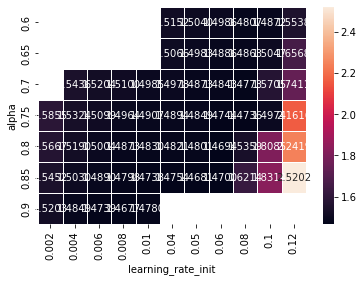

In [22]:
pvt_k = pd.pivot_table(
        params_df, 
        values='val_mee_mean', 
        index='alpha',
        columns='learning_rate_init'
    )
sns.heatmap(pvt_k, annot=True, fmt=".f", linewidths=.5)

<AxesSubplot:xlabel='nesterov', ylabel='alpha'>

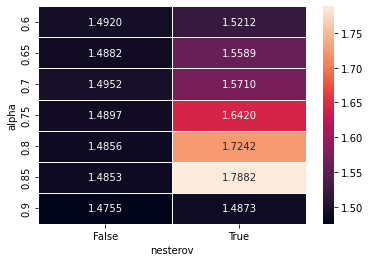

In [23]:
pvt_k = pd.pivot_table(
        params_df, 
        values='val_mee_mean', 
        index='alpha',
        columns='nesterov'
    )
sns.heatmap(pvt_k, annot=True, fmt=".4f", linewidths=.5)

<AxesSubplot:xlabel='learning_rate_init', ylabel='learning_rate'>

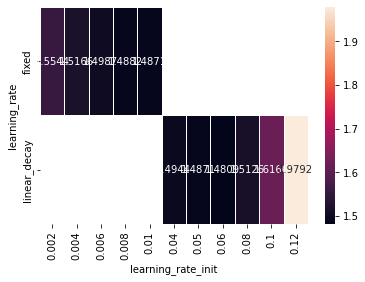

In [24]:
pvt_k = pd.pivot_table(
        params_df, 
        values='val_mee_mean', 
        index='learning_rate',
        columns='learning_rate_init'
    )
sns.heatmap(pvt_k, annot=True, fmt=".4f", linewidths=.5)

<AxesSubplot:xlabel='lambd', ylabel='learning_rate_init'>

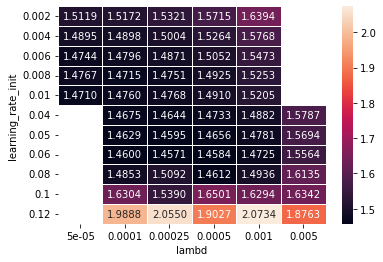

In [25]:
pvt_k = pd.pivot_table(
        params_df, 
        values='val_mee_mean', 
        index='learning_rate_init',
        columns='lambd'
    )
sns.heatmap(pvt_k, annot=True, fmt=".4f", linewidths=.5)

<AxesSubplot:xlabel='lambd', ylabel='learning_rate'>

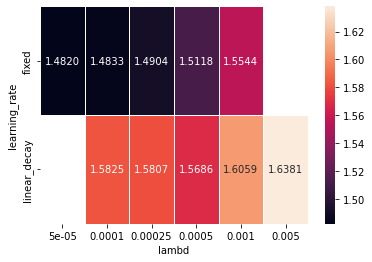

In [26]:
pvt_k = pd.pivot_table(
        params_df, 
        values='val_mee_mean', 
        index='learning_rate',
        columns='lambd'
    )
sns.heatmap(pvt_k, annot=True, fmt=".4f", linewidths=.5)

In [27]:
# mse / mee discrepanti??
# overflow: rank 1080, 1104 (hanno alpha, lr alti e nesterov True)
# anche keras ha varianza alta?
# cosa hanno in comune le migliori e le peggiori?
# curve dei migliori sul 20% del dev set (early stopping con patience alta e val size 0.2)
# se il training error non decresce è un problema? sembra che se non overfitta su pochi dati sia sbagliato!
# errori sull'internal test set dei primi x (confrontiamo con risultati degli altri)
# ensemble dei modelli che vanno meglio su ciascuno split?
# vedere se le diverse performance sui fold dipendono da inizializzazione dei pesi o sono i dati nei fold (magari alcuni modelli predicono meglio punti...)
# vedere su quali punti sbagliano i primi modelli (da grafici con bisettrici lo capiamo?)
# intorno alle 40 dev std alta?
# quelli con tr error < vanno in overfitting? anche se non sono buone provare le curve per capire se overfitting in generale capita con questi params
# cosa scartare delle ultime
# quando lambda piccolo va in overfitting? verificare con curve
# evitare di fare piantare le migliori? il learning rate potrebbe essere troppo piccolo / i pesi potrebbero essere saturati / 
# errori train / mse fold per fold
# ancora grid search? come scegliere il modello finale?
# MONKS!

# HEATMAP FATTE
# pulire repo (file e branch)
# alpha - learning rate init
# alpha - nesterov
# learning rate - learning rate init
# learning rate - lambd
# learning rate init - lambd
# ...

# TENIAMO IN CONSIDERAZIONE CHE:
# reti più grosse => regolarizzazione maggiore (+pesi=+parametri)
# favorire modelli con lambda più alto se hanno pari perf (meno complessi, meno probabile che vadano in overfitting)
# se non troviamo trend => facciamo ensemble (oppure se dev std alta)

# NEL FRATTEMPO:
# Pulire codice gs e val e nel frattempo e mettere su script per ensemble / evaluation finale?
# Per la classificazione fare controlli in score (target encoding) 
# Rivedere implementazione metriche!!! Eventualmente implementare score in modo che prenda una lista di metriche e restituisca una lista di predizioni. 
# Senza linear decay non fare il controllo su tau 
# Fare test su Monk, curve e risultati in tabella (migliore configurazione)